##**Credit Card Default Prediction**

In [1]:
# Step 1 : import library
import pandas as pd

In [4]:

# Step 2 : import data
df = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Credit%20Default.csv')

In [5]:
df.head()

,Income,Age,Loan,Loan to Income,Default
0,66155.92510,59.017015,8106.532131,0.122537,0
1,34415.15397,48.117153,6564.745018,0.190752,0
2,57317.17006,63.108049,8020.953296,0.139940,0
3,42709.53420,45.751972,6103.642260,0.142911,0
4,66952.68885,18.584336,8770.099235,0.130990,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          2000 non-null   float64
 1   Age             2000 non-null   float64
 2   Loan            2000 non-null   float64
 3   Loan to Income  2000 non-null   float64
 4   Default         2000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 78.3 KB


In [7]:
df.describe()

,Income,Age,Loan,Loan to Income,Default
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,45331.600018,40.927143,4444.369695,0.098403,0.141500
std,14326.327119,13.262450,3045.410024,0.057620,0.348624
min,20014.489470,18.055189,1.377630,0.000049,0.000000
25%,32796.459720,29.062492,1939.708847,0.047903,0.000000
50%,45789.117310,41.382673,3974.719418,0.099437,0.000000
75%,57791.281670,52.596993,6432.410625,0.147585,0.000000
max,69995.685580,63.971796,13766.051240,0.199938,1.000000


In [8]:
#Check missing values
df.isnull().sum()

,0
Income,0
Age,0
Loan,0
Loan to Income,0
Default,0


In [9]:
# Count of each category
df['Default'].value_counts()

,count
Default,
0,1717
1,283


In [ ]:
# Step 3 : define target (y) and features (X)

In [10]:
df.columns

Index(['Income', 'Age', 'Loan', 'Loan to Income', 'Default'], dtype='object')

In [11]:
X = df.drop(['Default'],axis=1)
y = df['Default']

In [12]:
# Step 4 : train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.2, random_state=2529)

In [13]:
# check shape of train and test sample
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 4), (1600, 4), (400,), (1600,))

In [25]:
# Step 5 : select model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

In [26]:
# Step 6 : train or fit model
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [27]:
# Step 7 : predict model
y_pred = model.predict(X_test)

In [28]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [29]:
# Step 8 : Evaluate
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [30]:
confusion_matrix(y_test,y_pred)

array([[1345,   25],
       [  63,  167]])

In [31]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1370
           1       0.87      0.73      0.79       230

    accuracy                           0.94      1600
   macro avg       0.91      0.85      0.88      1600
weighted avg       0.94      0.94      0.94      1600



In [22]:
accuracy_score(y_test,y_pred)

0.945

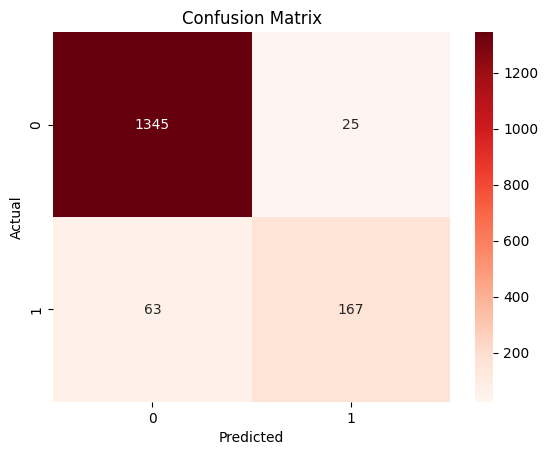

In [24]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [34]:
# Select Model 2: Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier( random_state=2529)


In [35]:
# Train Model
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=2529)

In [36]:
# Predict Model
y_pred_rf = rf.predict(X_test)

In [37]:
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1370
           1       0.87      0.73      0.79       230

    accuracy                           0.94      1600
   macro avg       0.91      0.85      0.88      1600
weighted avg       0.94      0.94      0.94      1600

